In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import skew
%matplotlib inline
rcParams['figure.figsize'] = (12.0, 6.0)

df_train = pd.read_csv( "train.csv" )
df_test = pd.read_csv( "test.csv" )

In [2]:
print(f"train shape : {df_train.shape}")
print(f" test shape : {df_test.shape}")

train shape : (307, 9)
 test shape : (131040, 8)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
Time               307 non-null object
TIC-211.PV(#21)    307 non-null float64
#70                307 non-null float64
TIC-212.SP         307 non-null float64
#45(AS105)         307 non-null float64
PI-204             307 non-null float64
TI-209             307 non-null float64
TI-210             307 non-null float64
AS105ST_Aceto      307 non-null float64
dtypes: float64(8), object(1)
memory usage: 21.7+ KB


In [4]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
print(f"numerical feature: {df_train.describe().shape}")
df_train.describe()

numerical feature: (8, 8)


,TIC-211.PV(#21),#70,TIC-212.SP,#45(AS105),PI-204,TI-209,TI-210,AS105ST_Aceto
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,87.006059,65.875179,111.862638,105.625863,0.635896,43.953160,66.978893,42.481498
std,0.591126,0.286999,0.229563,0.352443,0.010134,0.745993,0.926757,0.926716
min,81.820000,64.980000,110.880000,104.340000,0.590000,41.420000,64.510000,39.620000
25%,86.775000,65.640000,111.700000,105.385000,0.630000,43.395000,66.495000,42.050000
50%,87.010000,65.880000,111.880000,105.650000,0.640000,44.150000,67.040000,42.590000
75%,87.275000,66.090000,112.035000,105.900000,0.640000,44.475000,67.695000,42.900000
max,88.730000,66.490000,112.330000,106.850000,0.660000,45.530000,69.060000,45.600000


In [5]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {df_train.describe(include='O').shape}")
df_train.describe(include="O")

categorical features: (4, 1)


,Time
count,307
unique,307
top,2019/6/17 16:30
freq,1


In [ ]:
# #dump too many NAs (由data數量判斷出以下feature具有大量缺值，故將這些feature drop掉)
# df_train = df_train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
# df_test = df_test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)

In [7]:
#檢查是否有正確drop掉不需要之feature
# print(f"categorical features: {df_train.describe(include='O').shape}")
# df_train.describe(include="O")

categorical features: (4, 38)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


## 關係矩陣

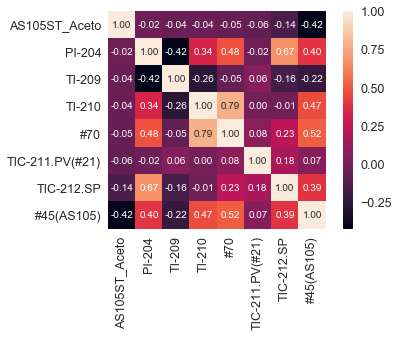

In [6]:
corrmat = df_train.corr()
k  = 10 
cols = corrmat.nlargest(k, 'AS105ST_Aceto')['AS105ST_Aceto'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
## 由關係矩陣圖可見feature與SalePrice的關係

## EDA (Drop Outlier丟棄離群值)

In [7]:
df_train.shape

(307, 9)

523     184750
691     755000
1182    745000
1298    160000
Name: SalePrice, dtype: int64


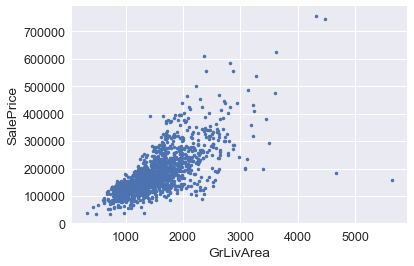

In [11]:
# It helps to drop outliers for relevant features 
# plt.plot(df_train.GrLivArea, df_train.SalePrice, '.' )
# plt.xlabel('GrLivArea')
# plt.ylabel('SalePrice')
# print( df_train[ df_train.GrLivArea > 4000 ].SalePrice )

496     430000
523     184750
1298    160000
Name: SalePrice, dtype: int64


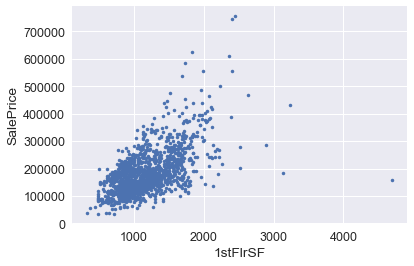

In [12]:
# 1stFlrSF seems relevant
# plt.plot(df_train['1stFlrSF'], df_train['SalePrice'], '.')
# plt.xlabel('1stFlrSF')
# plt.ylabel('SalePrice')
# print( df_train[ df_train['1stFlrSF'] > 3000 ].SalePrice )

In [13]:
# drop掉離群值
# df_train = df_train.drop( labels = df_train[ df_train.GrLivArea > 4500 ].index, axis = 0 )
# print( df_train[ df_train.GrLivArea > 4000 ].SalePrice )

691     755000
1182    745000
Name: SalePrice, dtype: int64


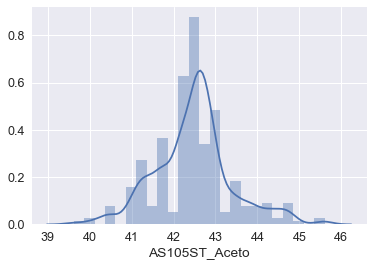

In [8]:
sns.distplot(df_train.AS105ST_Aceto)

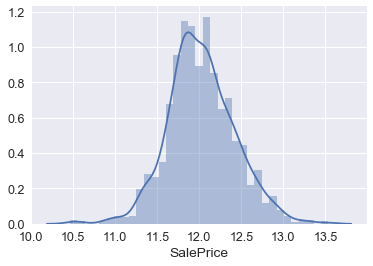

In [15]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
# sns.distplot(np.log(df_train.SalePrice))

## 將數值型feature的NA值移除、計算NA值數量、sketch pics

In [16]:
#取得數值型態的欄位
# numeric_data = df_train._get_numeric_data()
# numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

there are 0 NaN in Id


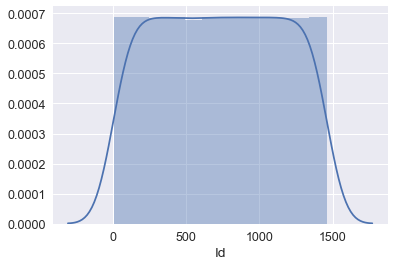

there are 0 NaN in MSSubClass


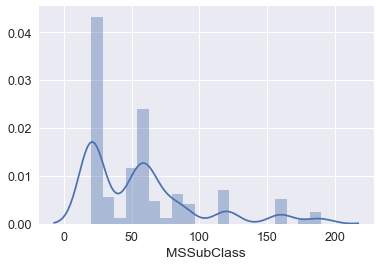

there are 259 NaN in LotFrontage


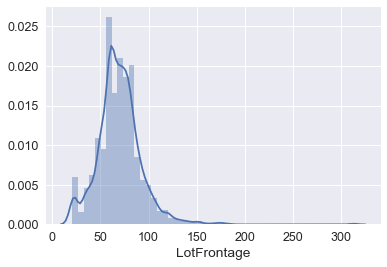

there are 0 NaN in LotArea


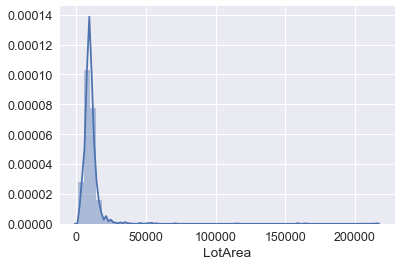

there are 0 NaN in OverallQual


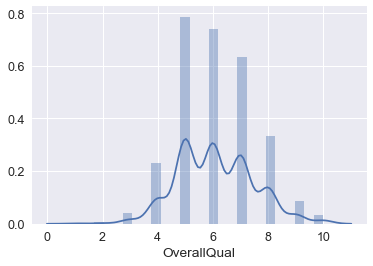

there are 0 NaN in OverallCond


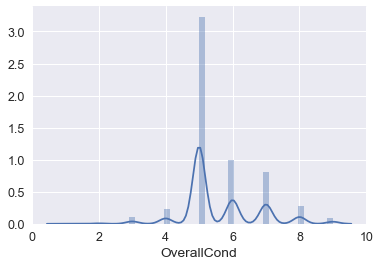

there are 0 NaN in YearBuilt


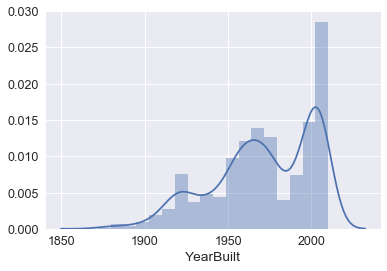

there are 0 NaN in YearRemodAdd


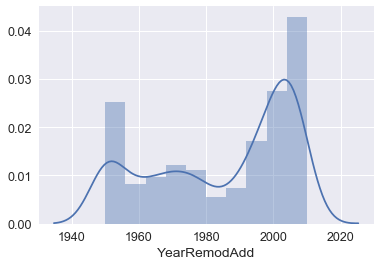

there are 8 NaN in MasVnrArea


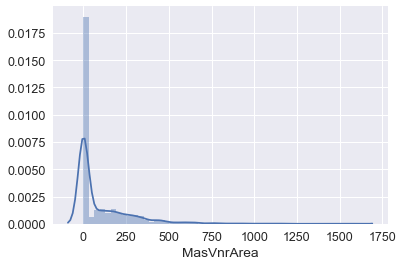

there are 0 NaN in BsmtFinSF1


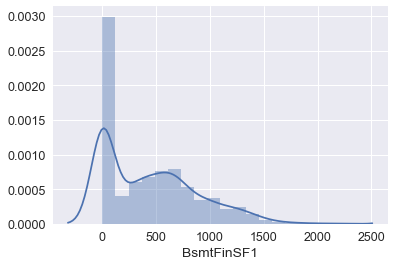

there are 0 NaN in BsmtFinSF2


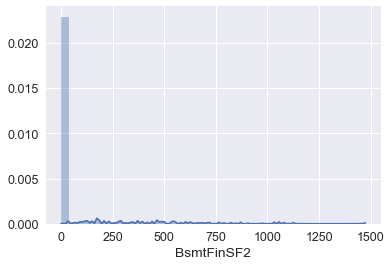

there are 0 NaN in BsmtUnfSF


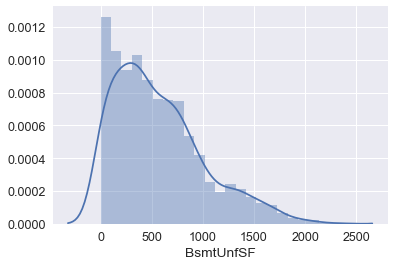

there are 0 NaN in TotalBsmtSF


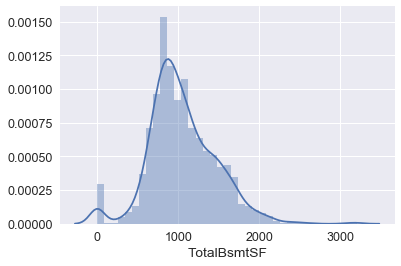

there are 0 NaN in 1stFlrSF


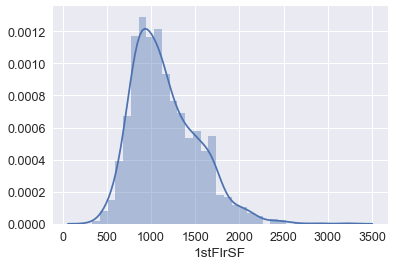

there are 0 NaN in 2ndFlrSF


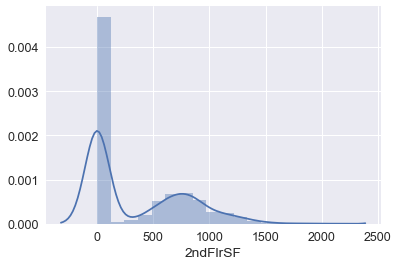

there are 0 NaN in LowQualFinSF


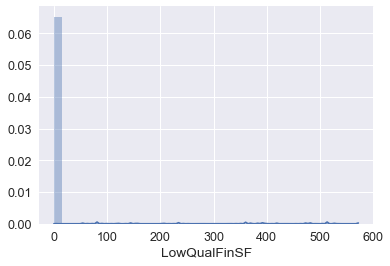

there are 0 NaN in GrLivArea


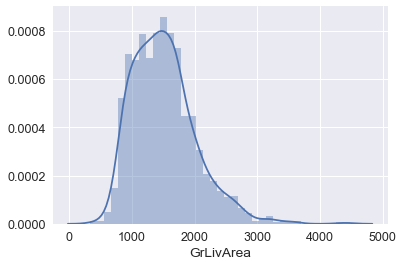

there are 0 NaN in BsmtFullBath


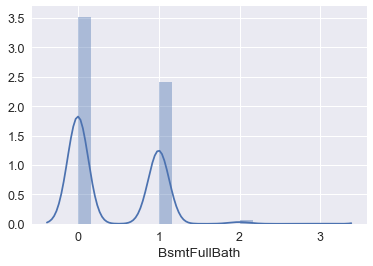

there are 0 NaN in BsmtHalfBath


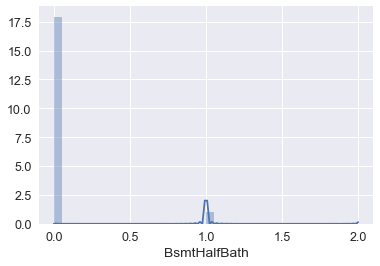

there are 0 NaN in FullBath


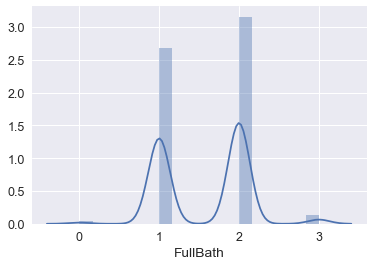

there are 0 NaN in HalfBath


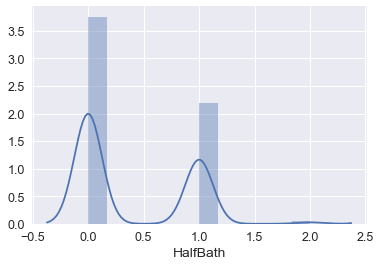

there are 0 NaN in BedroomAbvGr


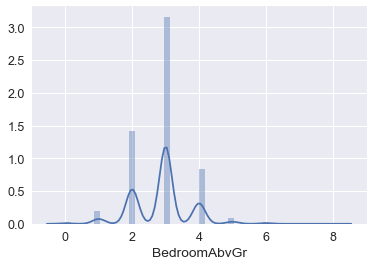

there are 0 NaN in KitchenAbvGr


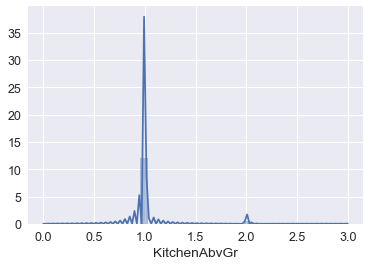

there are 0 NaN in TotRmsAbvGrd


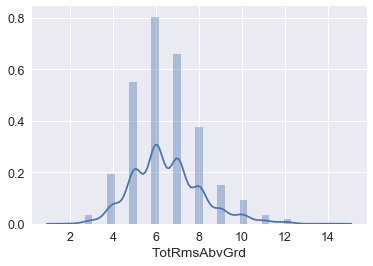

there are 0 NaN in Fireplaces


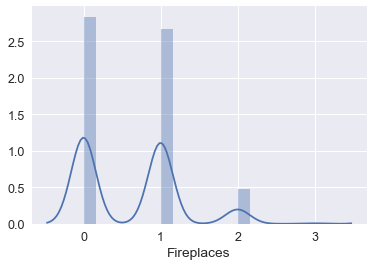

there are 81 NaN in GarageYrBlt


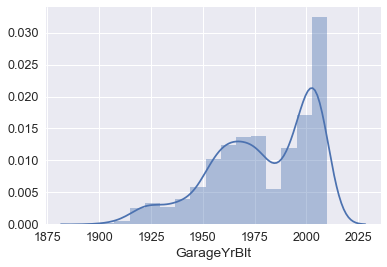

there are 0 NaN in GarageCars


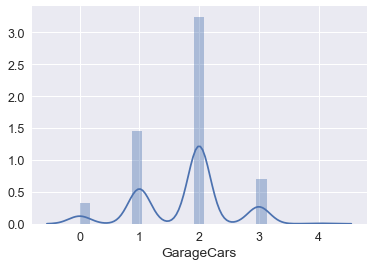

there are 0 NaN in GarageArea


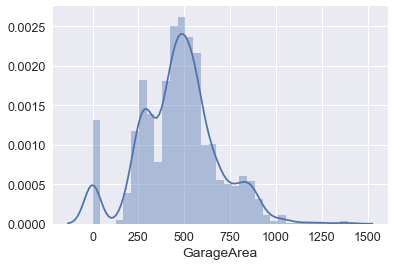

there are 0 NaN in WoodDeckSF


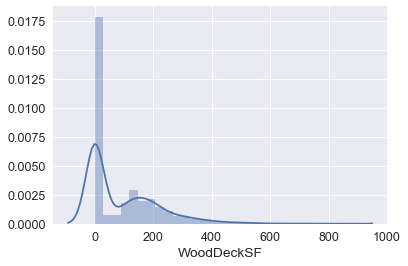

there are 0 NaN in OpenPorchSF


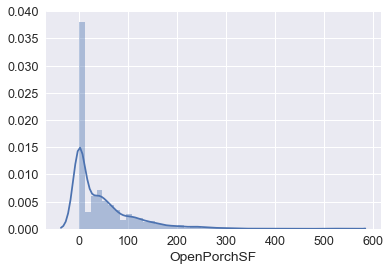

there are 0 NaN in EnclosedPorch


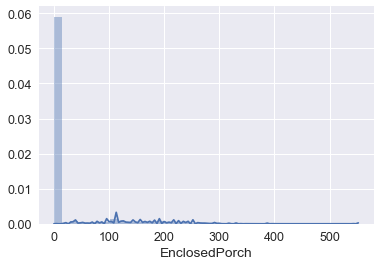

there are 0 NaN in 3SsnPorch


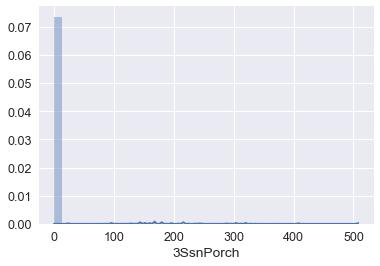

there are 0 NaN in ScreenPorch


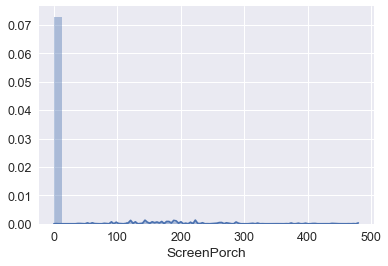

there are 0 NaN in PoolArea


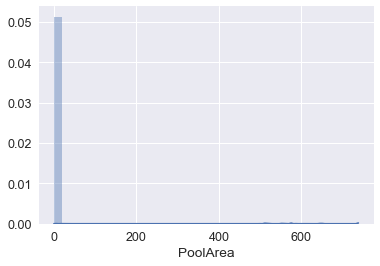

there are 0 NaN in MiscVal


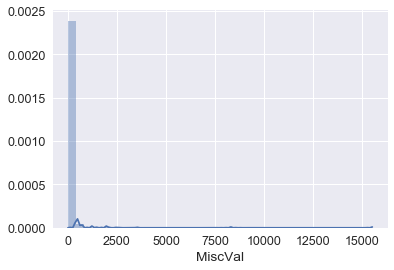

there are 0 NaN in MoSold


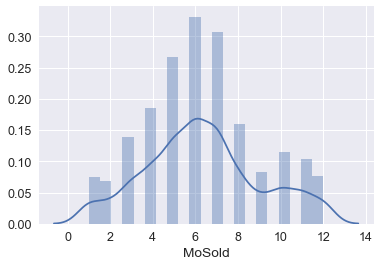

there are 0 NaN in YrSold


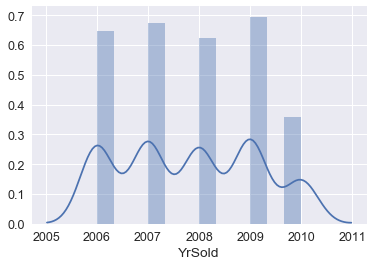

there are 0 NaN in SalePrice


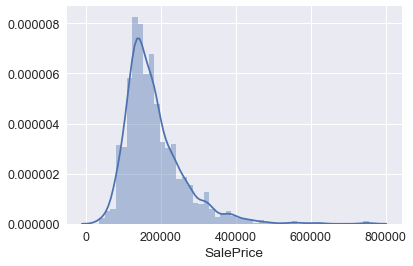

In [17]:
# drop掉每個欄位的NA值並劃出其分布
# for i in numeric_data:
#     temp = df_train[i].dropna()  ##df_train[i].dropna()會將i欄位底下之Na值drop掉
#     print(f"there are {df_train[i].shape[0] - temp.shape[0]} NaN in {i}")
#     sns.distplot(temp) 
#     plt.show()

## Drop Null Feature(s)將具有大量缺值的feature drop掉

In [ ]:
##建立一個train與test data的ID、SalePrice欄位移走後，合併之data Frame
# df_all = pd.concat( [ df_train.drop( [ 'Time', 'AS105ST_Aceto' ], axis = 1 ),
#                       df_test.drop( [ 'Time' ], axis = 1 ) ],
#                       axis = 0, ignore_index = False )

In [9]:
df_all=pd.concat( [df_train.drop( [ 'Time', 'AS105ST_Aceto' ], axis = 1 ),
                   df_test.drop( [ 'Time' ], axis = 1 ) ],
                      axis = 0, ignore_index = False )

In [10]:
# check null status
print(df_all.shape)

# #找出缺值的data
# df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()  
# print( df_na[df_na>100].sort_values(ascending=False) )

(131347, 7)


In [20]:
# drop掉大多為Null的欄位
# df_all = df_all.drop(['LotFrontage'], axis = 1) # for 486 null values (train + test)
# print( df_all.shape )

(2917, 73)


In [21]:
# drop掉大多為Null的欄位
# df_all = df_all.drop(['GarageYrBlt'], axis = 1) # for 159 null values
# print(df_all.shape)

(2917, 72)


## Numerical to Categorical(將數值feature轉為類別型feature)

In [22]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
# 將資料根據 MSSubClass進行分組，並將各組中SalePrice的中位數，與各組總數目列出。>>> ascending若為False，SalePrice由大排至小
# df_train[['MSSubClass','SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,MSSubClass
MSSubClass,,
60,216000,297
120,192000,87
80,166500,58
75,163500,16
20,159250,536
70,156000,60
160,146000,63
40,142500,4
85,140750,20


In [23]:
# It helps to transform some numerical features to categorical
# df_all.MSSubClass = df_all.MSSubClass.astype( str )
# df_all.OverallCond = df_all.OverallCond.astype( str )
# df_all.YrSold = df_all.YrSold.astype( str )
# df_all.MoSold = df_all.MoSold.astype( str )

In [24]:
# handle skewness
# df_train.SalePrice = np.log( df_train.SalePrice )

# num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# # na drop should be done series by series
# skewed_feats = df_train[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
# print(skewed_feats)
# skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# # print(skewed_feats)
# df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )

LotArea          12.560986
OverallQual       0.200579
YearBuilt        -0.611665
YearRemodAdd     -0.501322
MasVnrArea        2.685003
BsmtFinSF1        0.764002
BsmtFinSF2        4.247550
BsmtUnfSF         0.919955
TotalBsmtSF       0.511177
1stFlrSF          0.886723
2ndFlrSF          0.812121
LowQualFinSF      8.995688
GrLivArea         1.009951
BsmtFullBath      0.589751
BsmtHalfBath      4.095895
FullBath          0.031239
HalfBath          0.679351
BedroomAbvGr      0.212107
KitchenAbvGr      4.480268
TotRmsAbvGrd      0.659822
Fireplaces        0.631409
GarageCars       -0.342025
GarageArea        0.131612
WoodDeckSF        1.544214
OpenPorchSF       2.337421
EnclosedPorch     3.083987
3SsnPorch        10.286510
ScreenPorch       4.114690
PoolArea         15.932532
MiscVal          24.434913
dtype: float64


In [11]:
# df_all.describe(include = "O")

ValueError: No objects to concatenate

## One-Hot Encoding

In [26]:
# df_all_dum = pd.get_dummies(df_all); #會自動將str型別的feature進行one-hot Encoding，數值型別的feature則無動作
# df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [27]:
# 將NA的值填平均值
# df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


## Standardization (對所有數值型DATA)

In [11]:
# normalization helps a bit  將所有數值型data都做 Normalization
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
from sklearn import preprocessing
df_all[ num_feats ] = preprocessing.scale( df_all[ num_feats ] )
df_all[ num_feats ].head()

,TIC-211.PV(#21),#70,TIC-212.SP,#45(AS105),PI-204,TI-209,TI-210
0,0.019817,-1.955247,1.195246,-3.328463,0.394592,-0.235209,-2.638626
1,0.115257,-2.053838,1.111289,-0.990801,0.394592,-0.194542,-2.123456
2,-0.247416,-1.133655,1.824925,0.422669,0.394592,-0.777438,-2.241516
3,0.344313,-1.297974,1.321182,-0.365613,0.394592,-0.180986,-2.284447
4,-0.381032,-0.837882,1.363160,-2.159632,0.394592,0.239241,-2.584963


## Training Start

In [12]:
# inputs
from sklearn.model_selection import train_test_split
X = df_all[ :df_train.shape[0]]
y = df_train.AS105ST_Aceto

X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 10)

X_test = df_all[ df_train.shape[0]: ]

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
##for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
##    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
##    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
##    y_train = y.values[ train_index ]
##    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    
##    model_XGB = XGBRegressor()
##    model_XGB.fit(X_train, y_train)
##    y_pred = model_XGB.predict(X_val)
##    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
##    pred_tmp+=np.exp(y_ans)
##    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
##    print('  R2:', metrics.r2_score(y_val, y_pred))
##y_answer_XGB = pred_tmp/5

In [14]:
##使用訓練集資料X進行預測之分數
model_XGB = XGBRegressor()
model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

[17:10:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.49491908888940417
  R2: 0.723325936949387


In [15]:
##使用驗證集資料X_val進行預測之分數
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.7493669765273576
  R2: -0.006154911305681576


In [16]:
##使用test資料進行預測了
y_answer_XGB = model_XGB.predict( X_test )
# y_answer_XGB = np.exp(y_answer_XGB) 
print(pd.DataFrame({'AS105ST_Aceto': y_answer_XGB}, index=df_test.Time).head())

                AS105ST_Aceto
Time                         
2019/4/1 00:00      44.338505
2019/4/1 00:01      44.338505
2019/4/1 00:02      44.338505
2019/4/1 00:03      44.328129
2019/4/1 00:04      44.328129


In [16]:
pd.DataFrame({'AS105ST_Aceto': y_answer_XGB}, index=df_test.Time).to_csv('submission_XGboost.csv')